The “brightness” of an image is a subjective term. The National Telecommunications and Information Administration (NTIA)1 publishes standard definitions for the names of attributes of signals and images. The NTIA’s US Federal Glossary of Telecommunication Terms (FS-1037C), states that “’brightness’ should now be used only for non-quantitative references to physiological sensations and perceptions of light.”2 So, the term conveys no precise technical meaning. For this course, we will define the brightness of an image to be its average intensity on a scale of {0, . . . , 255} or [0, 1] depending on the class of the image.



1. Find a 24-bit truecolor image of your choice to use in these problems. Display it in your report with a photo credit. The image should exhibit a full range of values and colors. If both its linear dimensions are greater than 512, resize it so the the larger of the two dimensions is 512. Read the Matlab documentation on imresize(). Then use it with the “bicubic” option to resize your image. If both the image’s dimensions are less than or equal to 512 you may keep it as is. Determine the image’s class and dimensions (after resizing) and include them in your report. Also compute the mean intensity value of the image using the Matlab code, mu = mean(I(:)); where, of course, I is the image array.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

import numpy as np

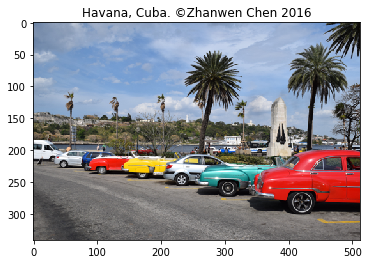

In [2]:
havana = Image.open('ZhanwenChenHavana.jpg')

maxwidth = 512
maxheight = 512
ratio = min(maxwidth/havana.size[0], maxheight/havana.size[1])
new_shape = (havana.size[0] * ratio, havana.size[1] * ratio)
havana.thumbnail(new_shape, Image.BICUBIC)
plt.imshow(havana)
plt.title('Havana, Cuba. ©Zhanwen Chen 2016')
plt.show()

1. Determine the image’s class and dimensions (after resizing) and include them in your report.

In [3]:
havana_np = np.array(havana) # 
print('1. havana_np.dtype =', havana_np.dtype)

1. havana_np.dtype = uint8


1. Also compute the mean intensity value of the image using the Matlab code, mu = mean(I(:)); where, of course, I is the image array.

In [4]:
original_mean = havana_np.mean()
print('1. The mean intensity value of the image is', original_mean)

1. The mean intensity value of the image is 128.3995238422532


2.

Write a Matlab function to alter the brightness of an image of class uint8. The function should work on either grayscale or truecolor images. It does not need to work on colormapped images.

The average intensity of an image can be used as an indicator of its perceived brightness. Many off-the-shelf image processing programs have a brightness control based on a percent change in image brightness. Therefore the function you write should input an image array, say I, of class uint8 and a number, p. If p is less than 100 the result should be a darker image; if it is greater than 100 the result should be brighter than the original.

The output should be an image, say J, of class uint8 whose mean intensity is (in theory) p percent of the mean value of I.

The first thing your function should do is convert the image to double. Then compute the mean of the image, mu = mean(I(:));.

Then compute the brightness shift,
g = (p/100 - 1)*mu;

Add g to every pixel in the image and convert the resulting image to uint8. (That can be done without loops in one line of code.)

Return the brightness-shifted, class uint8 image.

This function should not be long, so include the code in your report here, rather than in an appendix. If you are using Matlab ’s code sections and publish function just cut and paste the function’s code into the section and comment every line of it.


In [5]:
def adjustBrithness(image, p):
    mean = image.mean()
    brightness_shift = (p/100.0 - 1.0) * mean;
    return np.add(image, brightness_shift).clip(0, 255).astype('uint8') # must clip: otherwise 256=>1 instead of 255

3.

Increase and decrease the brightness of your image by 10% and by 50%. Then you will have 4 new images: one 10% dimmer image, one 10% brighter image, one 50% dimmer image, and one 50% brighter image.

Display these in your report, each with a caption indicating which one it is. If you were to look at the 10% brightness-shifted images and the original separately in random order, viewing other images between them, do you think you could accurately tell which was which? What about the 50% shifted images?


In [6]:
havana_darker_10 = adjustBrithness(havana_np, 90)
havana_brighter_10 = adjustBrithness(havana_np, 110)
havana_darker_50 = adjustBrithness(havana_np, 50)
havana_brighter_50 = adjustBrithness(havana_np, 150)

3


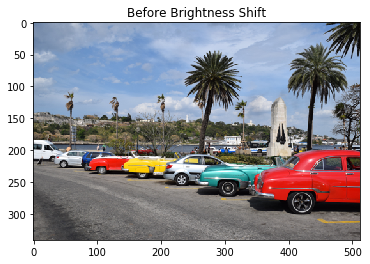

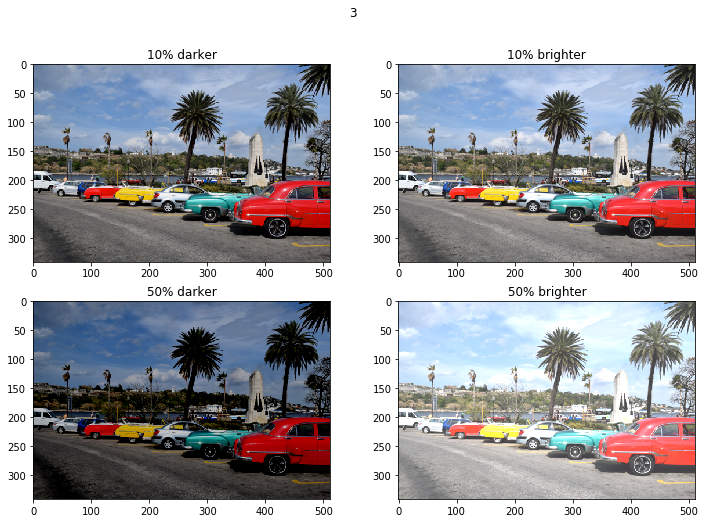

In [7]:
print('3')

# Display the original for comparison
plt.imshow(havana)
plt.title('Before Brightness Shift')
plt.show()

# Display the bright-shifted images
fig, axes = plt.subplots(2, 2, figsize=(12,8))
plt.suptitle('3')
axes[0][0].imshow(havana_darker_10)
axes[0][0].set_title('10% darker')
axes[0][1].imshow(havana_brighter_10)
axes[0][1].set_title('10% brighter')
axes[1][0].imshow(havana_darker_50)
axes[1][0].set_title('50% darker')
axes[1][1].imshow(havana_brighter_50)
axes[1][1].set_title('50% brighter')
plt.show()

3

If you were to look at the 10% brightness-shifted images and the original separately in random order, viewing other images between them, do you think you could accurately tell which was which? What about the 50% shifted images?

#### Answer: I wouldn't be able to accurately tell apart the 10% darker or the 10% brighter image. However, the 50% shift in either direction is much more obvious.

4.

From the uint8 image, I, compute and display the numbers,

```matlab
muI = mean(I(:))
muI * 0.5
muI * 0.9
muI * 1.1
muI * 1.5
```

Compute and display the mean intensities of the 4 brightness-shifted uint8 images. (Be sure to label the numbers in your report.)

In [8]:
print('4\n')
print('havana_darker_10.mean() =', havana_darker_10.mean(), 'while 90% * original_mean =', 0.9 * original_mean)
print('havana_brighter_10.mean() =', havana_brighter_10.mean(), 'while 110% * original_mean =', 1.1 * original_mean)
print('havana_darker_50.mean() =', havana_darker_50.mean(), 'while 50% * original_mean =', 0.5 * original_mean)
print('havana_brighter_50.mean() =', havana_brighter_50.mean(), 'while 150% * original_mean =', 1.5 * original_mean)

4

havana_darker_10.mean() = 115.5282429893695 while 90% * original_mean = 115.55957145802788
havana_brighter_10.mean() = 140.32145039100683 while 110% * original_mean = 141.23947622647853
havana_darker_50.mean() = 68.71362376282991 while 50% * original_mean = 64.1997619211266
havana_brighter_50.mean() = 188.36524773949168 while 150% * original_mean = 192.59928576337978


4.

Are the means of the brightness shifted images equal to the corresponding percentages of the mean of the original image? 

#### Answer: They are not the same, except in the case of the 10% darker shift.

Depending on the image it is likely they are not the same. The following problems will explore the reasons for that.

5.

Write a new version of your brightness shift program that does not convert the results to uint8. After shifting the brightness of the class double image, return it with out converting it to uint8.

In [9]:
# 5.
def adjustBrithness_double(image, p):
    mean = image.mean()
    brightness_shift = (p/100.0 - 1.0) * mean;
    return np.add(image, brightness_shift)

6.

Compute and display the mean intensities of the 4 brightness-shifted class double images. (Be sure to label the numbers in your report.)

Are the means of the brightness shifted images equal to the corresponding percentages of the mean of the original image?

#### Answer: Without conversion to uint8, the means are indeed shifted exactly.

In [10]:
havana_darker_10_double = adjustBrithness_double(havana_np, 90)
havana_brighter_10_double = adjustBrithness_double(havana_np, 110)
havana_darker_50_double = adjustBrithness_double(havana_np, 50)
havana_brighter_50_double = adjustBrithness_double(havana_np, 150)

In [11]:
print('6. havana_darker_10_double.mean() =', havana_darker_10_double.mean(), 'while 90% * original_mean =', 0.9 * original_mean)
print('6. havana_brighter_10_double.mean() =', havana_brighter_10_double.mean(), 'while 110% * original_mean =', 1.1 * original_mean)
print('6. havana_darker_50_double.mean() =', havana_darker_50_double.mean(), 'while 50% * original_mean =', 0.5 * original_mean)
print('6. havana_brighter_50_double.mean() =', havana_brighter_50_double.mean(), 'while 150% * original_mean =', 1.5 * original_mean)

6. havana_darker_10_double.mean() = 115.55957145802779 while 90% * original_mean = 115.55957145802788
6. havana_brighter_10_double.mean() = 141.23947622647853 while 110% * original_mean = 141.23947622647853
6. havana_darker_50_double.mean() = 64.19976192112664 while 50% * original_mean = 64.1997619211266
6. havana_brighter_50_double.mean() = 192.59928576338 while 150% * original_mean = 192.59928576337978


7.

The difference between the means that should, theoretically, be the same but are not is due to two phenomena: “round-off” errors and ”clipping.” When a class double image is converted to class uint8, any intensity values that are not integers are converted to integers. Try this:

```matlab
uint8([128 128.4 128.5 128.6])
```

In [12]:
np.rint(np.array([128, 128.4, 128.5, 128.6])).astype(int)

array([128, 128, 128, 129])

7.

Based on what you see how are double values being converted to uint8?

#### Answer: Matlab rounds double values to the nearest integer

Now try this:

```matlab
uint8([-128 0 255 383])
```

In [13]:
np.array([-128, 0, 255, 383]).clip(0, 255).astype(int)

array([  0,   0, 255, 255])

7.

Why, do you suppose, is this phenomenon called clipping?

#### Answer: Because the conversion takes max(0, number) on one hand and min(number, 255) on the other.

7.

If there were no clipping, the mean intensity would shift along with all the intensities.

Let I be the original image and let $R$ = number of rows, $C$ = number of columns, and $B$ = number of bands in $I$. Then $N = R * C * B$, is the total number of scalar intensity values in $I$. The mean of $I$ is

$$a_0=\frac{1}{N} \sum_{b=1}^{B} \sum_{r=1}^{R} \sum_{c=1}^{C} I(r,c,b),$$


If all the intensities were shifted by d then

$$
\begin{equation} \label{eq1}
    \begin{split}
        a_1 & = \frac{1}{N} \sum_{b=1}^{B} \sum_{r=1}^{R} \sum_{c=1}^{C} (I(r,c,b)+d) \\
            & = \frac{1}{N} \sum_{b=1}^{B} \sum_{r=1}^{R} \sum_{c=1}^{C} I(r,c,b) + \frac{1}{N}Nd\\
            & = a_0+d.
    \end{split}
\end{equation}
$$



However, if clipping occurs this no longer holds. Try this:

```matlab
>> mean(0:256)
>> mean(-128:128)
>> mean(uint8(-128:128))
>> mean(128:384)
>> mean(uint8(128:384))
```

In [14]:
print('7. np.arange(257).mean() =', np.arange(257).mean())
print('7. np.arange(-128,129).mean() =', np.arange(-128,129).mean())
print('7. np.arange(-128,129).clip(0,255).mean() =', np.arange(-128,129).clip(0,255).mean())
print('7. np.arange(128,385).mean() =', np.arange(128,385).mean())
print('7. np.arange(128,385).clip(0,255).mean() =', np.arange(128,385).clip(0,255).mean())


7. np.arange(257).mean() = 128.0
7. np.arange(-128,129).mean() = 0.0
7. np.arange(-128,129).clip(0,255).mean() = 32.12451361867704
7. np.arange(128,385).mean() = 256.0
7. np.arange(128,385).clip(0,255).mean() = 223.37354085603113


7.

Given what you have observed, how does the mean change when the image is clipped at 0? How does it change when it is clipped at 255?

#### Answer: When the image is clipped at 0, the mean is bigger when there are negative numbers after a shift; if the image is clipped at 255, the mean is smaller when there are intensities above 255 after a shift.

8.

Operate on the 50% shifted images to “restore” them to their original brightness levels. Assuming no clipping, what percentage p should you use to restore

#### Answer: 

#### Analytically, the we can express the restoration p as a function of the original p:

$$
d(\mu, p) = (\frac{p}{100}-1) \times \mu.
$$


$$
\begin{equation}
    \begin{split}
        d_{01} & = d(\mu_0, p_0) = (\frac{p_0}{100}-1) \times \mu_0 \\
        \mu_1 & = \mu_0 + d_{01} \\
        d_{12} & = d(\mu_1, p_1) = (\frac{p_1}{100}-1) \times \mu_1 \\
            & = (\frac{p_1}{100}-1) \times (\mu_0 + d_0) \\
            & = (\frac{p_1}{100}-1) \times (\mu_0 + (\frac{p_0}{100}-1) \times \mu_0) \\
            & = (\frac{p_1}{100}-1) \times \frac{p_0}{100} \mu_0 \\
        \mu_2 & = \mu_1 + d_{12}.
    \end{split}
\end{equation}
$$

#### We want $d_1$ to cancel out $d_0$. That is,

$$
\begin{equation}
    \begin{split}
        \mu_2 & = \mu_0 \\
        \mu_1+d_{12} & = \mu_0 \\
        \mu_0+d_{01}+d_{12} & = \mu_0 \\
        d_{12} = -d_{01} \\
        (\frac{p_1}{100}-1) \times \frac{p_0}{100} \mu_0 & = - (\frac{p_0}{100}-1) \times \mu_0 \\
        (\frac{p_1}{100}-1) \times \frac{p_0}{100} & = 1 - \frac{p_0}{100} \\
        \frac{p_1}{100} \frac{p_0}{100} - \frac{p_0}{100} & = 1 - \frac{p_0}{100} \\
        \frac{p_1}{100} \frac{p_0}{100} & = 1 \\
        p_1 & = \frac{10000}{p_0}.
    \end{split}
\end{equation}
$$

#### Using this formula, to restore

#### (a) the 50% dimmer image, that is, 

$$
\begin{equation}
    \begin{split}
        p_1 & = \frac{10000}{p_0} \\
            & = \frac{10000}{50} \\
            & = 200
    \end{split}
\end{equation}
$$

#### (b) the 50% brighter image, that is, 

$$
\begin{equation}
    \begin{split}
        p_1 & = \frac{10000}{p_0} \\
            & = \frac{10000}{150} \\
            & = \frac{200}{3}
    \end{split}
\end{equation}
$$

In [21]:
print('8(a). havana_darker_50_double_restored.mean() =', adjustBrithness_double(havana_darker_50_double, 200).mean(), 'while original_mean =', original_mean)
print('8(b). havana_brighter_50_double_restored.mean() =', adjustBrithness_double(havana_brighter_50_double, 200/3).mean(), 'while original_mean =', original_mean)


8(a). havana_darker_50_double_restored.mean() = 128.39952384225322 while original_mean = 128.3995238422532
8(b). havana_brighter_50_double_restored.mean() = 128.39952384225316 while original_mean = 128.3995238422532


Use these numbers to generate two new uint8 images. 

Compare the mean values of these restored uint8 images to that of the original. 

Display the images, include titles so you know which is which, and 

comment on any differences you can see between them and the originals. You do not need to include the restored images in your report. However, if you use the Matlab publish feature to generate your report they will be included by default. And, of course, that’s OK.

#### Answer: (TODO)

9.

If clipping occurs due to processing of any kind, that means that information has been lost. Visually significant features of the image may be obliterated. That’s why I placed the word, restore, in quotes above. One may be able to re-shift the mean to the original number but the features that are lost will not return. Here, we will determine the extent of the damage by comparing the restored images to the originals.
Compute two images that are the squared differences between the original image and the restored 50% brightness increased and decreased images (the as follows:

```matlab
>> D = (double(I) - double(J)).^2;
where I is the original uint8 image and J is one of the uint8 restored images. Find and display the
minimum and maximum values of each difference image. The best way to display the difference images is by using
>> figure
>> imagesc(D) >> truesize
Comment on the results. What does each one show? How do the 10% difference images compare to the 50% difference images. Include all four of the difference images in your report.
```

#### Answer: (TODO)

10.

Color Modification through Brightness Shifting
If the brightness of only one color band is changed, the overall color of the image is changed.
Separate the truecolor image, I, into its three bands. That is, create three monochrome images, IR that is the red intensity, IG that is the green intensity, and IB that is the blue intensity from your truecolor image.
Display each of them as grayscale images. You may need to use the Matlab function gray(256) to generate the correct colormap. That is, to display one of the images do
5
EECE 4353 / 5353 Homework Assignment 2 Fall 2018

```matlab
>> figure;image(IR);truesize;colormap(gray(256); 
```

Use your brightness shifting function to:
(a) Increase the brightness of the red band by 20%. Then recombine it with the unchanged, original green and blue bands to create a new truecolor image. Display it and comment on its change from the original.
(b) Decrease the brightness of the red band by 20%. Then recombine it with the unchanged, original green and blue bands to create a new truecolor image. Display it and comment on its change from the original.
(c) Increase the brightness of the green band by 20%. Then recombine it with the unchanged, original red and blue bands to create a new truecolor image. Display it and comment on its change from the original.
(d) Decrease the brightness of the green band by 20%. Then recombine it with the unchanged, original red and blue bands to create a new truecolor image. Display it and comment on its change from the original.
(e) Increase the brightness of the blue band by 20%. Then recombine it with the unchanged, original red and green bands to create a new truecolor image. Display it and comment on its change from the original.
(f) Decrease the brightness of the blue band by 20%. Then recombine it with the unchanged, original red and green bands to create a new truecolor image. Display it and comment on its change from the original.
In general, how might you use this approach to tint the image with any given color?

#### Answer: (TODO)